<a href="https://colab.research.google.com/github/svetajamkina/PYTHON/blob/main/27_09_2024_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA EXTRACTION

In [1]:
import seaborn as sns
import pandas as pd

titanic_data = sns.load_dataset('titanic')

### DATA REVIEW

In [2]:
print("Number of passangers:",len(titanic_data))
titanic_data.columns
titanic_data.dtypes

titanic_data['class'].unique()

titanic_data.isnull().sum()

Number of passangers: 891


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### DATA TRANSFORMATION

In [3]:
titanic_data['deck'] = titanic_data['deck'].astype(str)
titanic_data['class'] = titanic_data['class'].astype(str)
titanic_data.fillna(0, inplace=True)
titanic_data.drop(['alive', 'alone', 'adult_male', 'deck'], axis=1, inplace=True)

titanic_data.isnull().sum()

titanic_data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 0], dtype=object)

In [4]:
# Mapping for embark_town
embark_town_mapping = {'Southampton': 1, 'Cherbourg': 2, 'Queenstown': 3, 0:0}
titanic_data['embark_town'] = titanic_data['embark_town'].map(embark_town_mapping)

# Mapping for sex
sex_mapping = {'male': 0, 'female': 1}
titanic_data['sex'] = titanic_data['sex'].map(sex_mapping)

# Mapping for embarked
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3, 0 : 0}
titanic_data['embarked'] = titanic_data['embarked'].map(embarked_mapping)

# Mapping for class
class_mapping = {'Third': 1, 'First': 2, 'Second': 3}
titanic_data['class'] = titanic_data['class'].map(class_mapping)

# Mapping for who
who_mapping = {'man': 1, 'woman': 2, 'child': 3}
titanic_data['who'] = titanic_data['who'].map(who_mapping)


In [5]:
titanic_data.isnull().sum() #NO MORE EMPTY VALUES

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### TRAIN AND TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = titanic_data.drop('survived', axis=1) #Independent variables
y = titanic_data['survived'] #Dependent variable

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

##Create data model

In [9]:
from sklearn.neighbors import KNeighborsClassifier #import the model

In [10]:
model = KNeighborsClassifier() #initialize

In [11]:
model.fit(X_train, y_train) #train the model

KNeighborsClassifier()

In [12]:
prediction_knn = model.predict(X_test) #prediction on test dattaset, because test dataset the model has not seen

##How good is the model?

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, prediction_knn)

0.659217877094972

##Confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm=confusion_matrix(y_test, prediction_knn)

In [17]:
print(cm)

[[83 30]
 [31 35]]


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

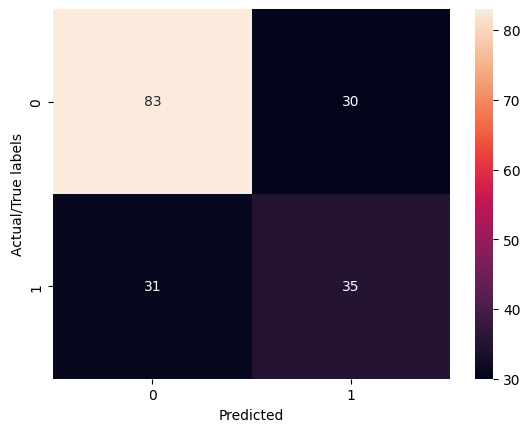

In [20]:
# visualize a heatmap from cm using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual/True labels')
plt.show()